В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [123]:
import pandas as pd
import seaborn as sns

from modules.modules_2.topic_2_3.homework.process_bank_churn import preprocess_data, preprocess_new_data
from modules.modules_2.topic_2_1.utils import get_importance_df, render_feature_importance
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [82]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
raw_df = pd.read_csv('../../topic_2_2/homeworks/bank-customer-churn-prediction-dlu/train.csv', index_col=0) # оскільки в наборі даних є колонка id - варто одразу її зчитати як індекс датасета

preprocessed_data = preprocess_data(raw_df, scaler_numeric=False)

X_train = preprocessed_data['X_train']
train_targets = preprocessed_data['train_targets']
X_val = preprocessed_data['X_val']
val_targets = preprocessed_data['val_targets']
input_cols = preprocessed_data['input_cols']
scaler = preprocessed_data['scaler']
encoder = preprocessed_data['encoder']

Numeric columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Binary columns: ['IsActiveMember', 'HasCrCard']
Categorical columns: ['Geography', 'Gender']


In [84]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
id,,,,,,,,,,,,
7180,682.0,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,1.0,0.0,0.0,1.0
10393,684.0,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,1.0,0.0,0.0,0.0
80,705.0,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,1.0,0.0,1.0
3365,669.0,58.0,0.0,0.00,2.0,0.0,1.0,51565.98,0.0,0.0,1.0,1.0
12236,707.0,21.0,3.0,0.00,2.0,1.0,1.0,148564.76,1.0,0.0,0.0,1.0


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [85]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import roc_auc_score

In [86]:
model = DecisionTreeClassifier(random_state=42)

In [87]:
%%time
model.fit(X_train, train_targets)

CPU times: user 28 ms, sys: 831 μs, total: 28.8 ms
Wall time: 28.2 ms


DecisionTreeClassifier(random_state=42)

In [88]:
train_preds = model.predict_proba(X_train)[:, 1]
val_preds = model.predict_proba(X_val)[:, 1]

In [89]:
val_targets.value_counts() / len(val_targets)

Exited
0.0    0.796667
1.0    0.203333
Name: count, dtype: float64

In [90]:
train_auc = roc_auc_score(train_targets, train_preds)
val_auc = roc_auc_score(val_targets, val_preds)

print(f'Train AUC: {train_auc:.4f}')
print(f'Val AUC: {val_auc:.4f}')

Train AUC: 1.0000
Val AUC: 0.7739


**Observations:**
Looks like our model is overfitted, because AUC on the training data is much higher than on the validation data and it is so sure about predicated data so it is not a good sign.

In [91]:
print(f'Depth: {model.get_depth()}')

Depth: 26


In [92]:
model_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42)

In [93]:
%%time
model_depth_2.fit(X_train, train_targets)

CPU times: user 6.16 ms, sys: 752 μs, total: 6.91 ms
Wall time: 6.24 ms


DecisionTreeClassifier(max_depth=2, random_state=42)

In [94]:
train_preds = model_depth_2.predict_proba(X_train)[:, 1]
val_preds = model_depth_2.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(train_targets, train_preds)
val_auc = roc_auc_score(val_targets, val_preds)

print(f'Train AUC: {train_auc:.4f}')
print(f'Val AUC: {val_auc:.4f}')

Train AUC: 0.8429
Val AUC: 0.8465


In [95]:
print(export_text(model_depth_2, feature_names=list(X_train.columns)))

|--- Age <= 43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- class: 0.0
|   |--- NumOfProducts >  1.50
|   |   |--- class: 0.0
|--- Age >  43.50
|   |--- NumOfProducts <= 1.50
|   |   |--- class: 1.0
|   |--- NumOfProducts >  1.50
|   |   |--- class: 0.0



**Observations:**
При зменшені глибини із 26 до 2, то ми бачимо, що тренувальні та валідаційні дані мають більш схожі значення AUC, що є добрим знаком. Модель стала більш генералізованою. Проте дивлячись на важливість ознак, ми бачимо, що тільки 2 ознаки є важливими для моделі: `Age` та `NumOfProducts`. При великій кількості ознак, треба збільшити глибину дерева, щоб модель могла вивчити більше залежностей.

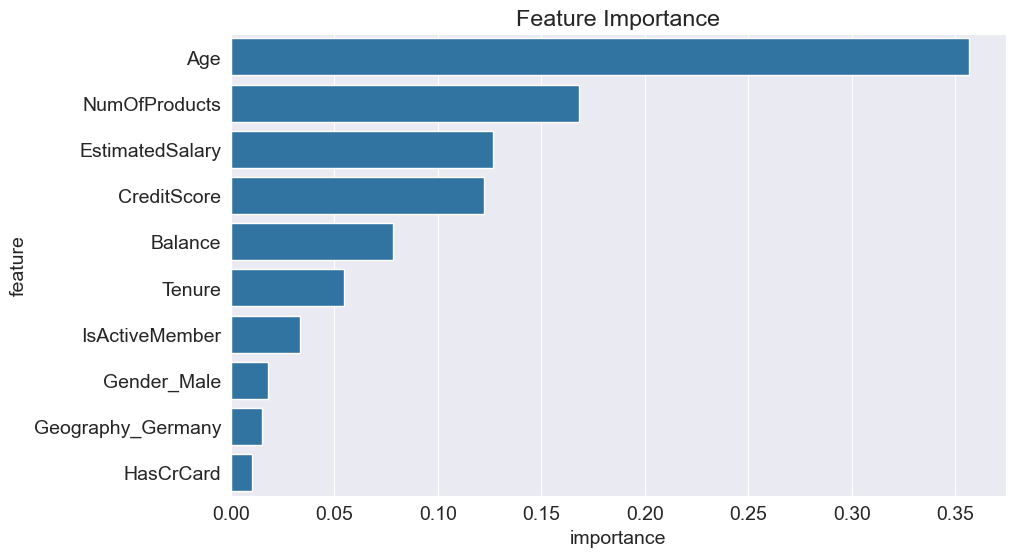

In [96]:
importance_df = get_importance_df(model, X_train)

render_feature_importance(importance_df)

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [69]:
def manually_guess_best_params(max_depth = None, max_leaf_nodes = None):
    model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
    model.fit(X_train, train_targets)

    train_preds = model.predict_proba(X_train)[:, 1]
    val_preds = model.predict_proba(X_val)[:, 1]

    train_auc = roc_auc_score(train_targets, train_preds)
    val_auc = roc_auc_score(val_targets, val_preds)
    return train_auc, val_auc, model

def print_model_info(train_auc, val_auc, model):
    print(f'Train AUC: {train_auc:.4f}')
    print(f'Val AUC: {val_auc:.4f}')
    print(f'Depth: {model.get_depth()}')
    print(f'Leaf nodes: {model.get_n_leaves()}')

train_auc, val_auc, model = manually_guess_best_params(max_depth=12)
print_model_info(train_auc, val_auc, model)
print('---------------------------------')

train_auc, val_auc, model = manually_guess_best_params(max_depth=10)
print('Max depth 10')
print_model_info(train_auc, val_auc, model)
print('---------------------------------')

train_auc, val_auc, model = manually_guess_best_params(max_depth=6)
print('Max depth 6')
print_model_info(train_auc, val_auc, model)
print('---------------------------------')

train_auc, val_auc, model = manually_guess_best_params(max_depth=4)
print('Max depth 4')
print_model_info(train_auc, val_auc, model)
print('---------------------------------')

train_auc, val_auc, model = manually_guess_best_params(max_leaf_nodes=100)
print('Max leaf nodes 100')
print_model_info(train_auc, val_auc, model)
print('---------------------------------')

train_auc, val_auc, model = manually_guess_best_params(max_leaf_nodes=10)
print('Max leaf nodes 10')
print_model_info(train_auc, val_auc, model)
print('---------------------------------')

Train AUC: 0.9862
Val AUC: 0.8223
Depth: 12
Leaf nodes: 688
---------------------------------
Max depth 10
Train AUC: 0.9698
Val AUC: 0.8486
Depth: 10
Leaf nodes: 408
---------------------------------
Max depth 6
Train AUC: 0.9338
Val AUC: 0.9198
Depth: 6
Leaf nodes: 56
---------------------------------
Max depth 4
Train AUC: 0.9113
Val AUC: 0.9113
Depth: 4
Leaf nodes: 15
---------------------------------
Max leaf nodes 100
Train AUC: 0.9372
Val AUC: 0.9115
Depth: 13
Leaf nodes: 100
---------------------------------
Max leaf nodes 10
Train AUC: 0.9015
Val AUC: 0.9002
Depth: 5
Leaf nodes: 10
---------------------------------


**Спостереження:**
Виглядає, що при depth 4 та leaf nodes 15 ми маємо найкращий результат, що дорівнює 0.9113 як на train так і на validation даних.

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [70]:
def find_best_depth():
    train_scores = []
    val_scores = []
    for depth in range(1, 21):
        train_auc, val_auc, _ = manually_guess_best_params(max_depth=depth)
        train_scores.append(train_auc)
        val_scores.append(val_auc)
    return train_scores, val_scores

In [71]:
%%time
train_scores, val_scores = find_best_depth()

CPU times: user 461 ms, sys: 6.58 ms, total: 467 ms
Wall time: 468 ms


In [75]:
# Build dataframe
errors_df = pd.DataFrame({
    'depth': range(1, 21),
    'train': train_scores,
    'val': val_scores
})

errors_df.style.background_gradient(subset='val', cmap='Blues_r')

,depth,train,val
0,1,0.744727,0.734865
1,2,0.842908,0.846496
2,3,0.897184,0.891146
3,4,0.911281,0.911264
4,5,0.925694,0.921927
5,6,0.933778,0.919789
6,7,0.941535,0.914449
7,8,0.949541,0.902598
8,9,0.959079,0.885731
9,10,0.969761,0.848573


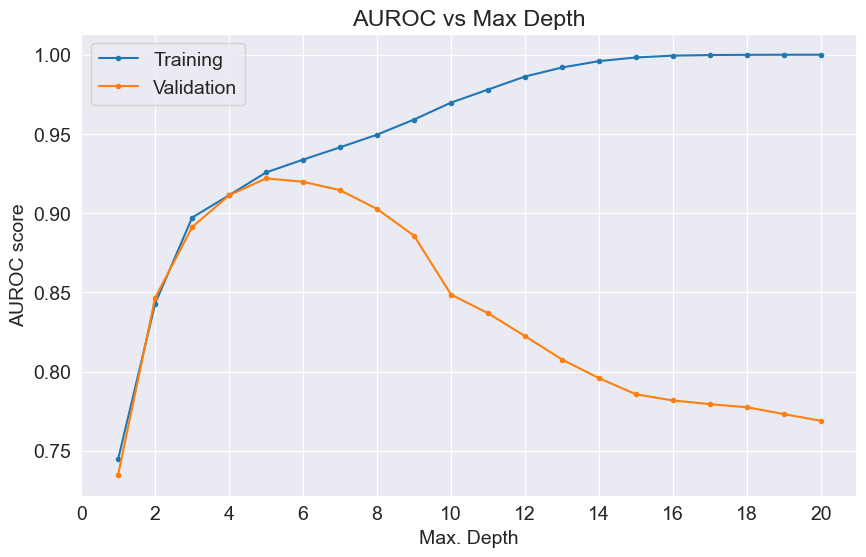

In [108]:
plt.figure()
plt.plot(errors_df['depth'], errors_df['train'], marker='.')
plt.plot(errors_df['depth'], errors_df['val'], marker='.')
plt.title('AUROC vs Max Depth')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('AUROC score')
plt.legend(['Training', 'Validation']);

### **Додаткове завдання**
Знайти оптимальну к-сть leaf nodes для кожної глибини дерева.

In [109]:
def find_best_leaf_nodes_per_depths(depths=range(1, 21)):
    best_leaf_nodes = []
    for depth in depths:
        best_auc = 0
        best_leaf_node = 0
        for leaf_nodes in range(2, 150):
            train_auc, val_auc, _ = manually_guess_best_params(max_depth=depth, max_leaf_nodes=leaf_nodes)
            if val_auc > best_auc:
                best_auc = val_auc
                best_leaf_node = leaf_nodes
        best_leaf_nodes.append(best_leaf_node)
    return best_leaf_nodes

In [112]:
%%time
best_leaf_nodes = find_best_leaf_nodes_per_depths()

CPU times: user 46.7 s, sys: 627 ms, total: 47.4 s
Wall time: 47.4 s


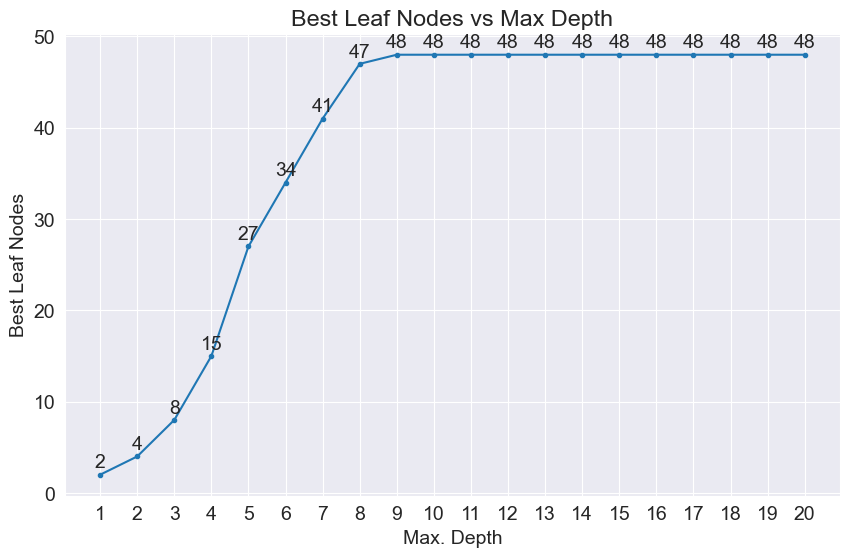

In [116]:
plt.figure()
plt.plot(range(1, 21), best_leaf_nodes, marker='.')
plt.title('Best Leaf Nodes vs Max Depth')
plt.xlabel('Max. Depth')
plt.ylabel('Best Leaf Nodes')
plt.xticks(range(1, 21))  # Set x-axis ticks to be integers from 1 to 20

# Annotate each point with its Y value
for i, value in enumerate(best_leaf_nodes):
    plt.annotate(f'{value}', (i + 1, value), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [135]:
best_max_depth = 5

model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)

In [136]:
%%time
model.fit(X_train, train_targets)

CPU times: user 16 ms, sys: 1.02 ms, total: 17 ms
Wall time: 16.3 ms


DecisionTreeClassifier(max_depth=5, random_state=42)

In [137]:
test_raw_df = pd.read_csv('../../topic_2_2/homeworks/bank-customer-churn-prediction-dlu/test.csv')
sample_submission = pd.read_csv('../../topic_2_2/homeworks/bank-customer-churn-prediction-dlu/sample_submission.csv')

preprocessed_test_df = preprocess_new_data(test_raw_df, scaler, encoder, scaler_numeric=False)

Numeric columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Binary columns: ['IsActiveMember', 'HasCrCard']
Categorical columns: ['Geography', 'Gender']


In [138]:
preprocessed_test_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,1.0
1,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,1.0
2,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,1.0
3,717.0,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,1.0
4,592.0,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,1.0


In [139]:
test_preds = model.predict_proba(preprocessed_test_df)[:, 1]

print(test_preds)
sample_submission['Exited'] = test_preds

# Save the submission
sample_submission.to_csv(f'submission_decision_trees_max_depth_{model.get_depth()}_max_leaf_nodes_{model.get_n_leaves()}.csv', index=False)

[0.23791103 0.02761341 0.02761341 ... 0.00892374 0.04173355 0.20459082]


<img src="img.png" alt="Drawing"/>